In [7]:
%load_ext autoreload
%autoreload 2


from rpgm_algo import RpgAlgorithm
import numpy as np
import awesomeplot.core as ap
import scipy.sparse as sp
import igraph as ig

from gsc_libs import *

%matplotlib notebook

In [8]:
def sparse_from_dict(dic):
    shape = list(np.repeat(np.asarray(dic.keys()).max() + 1,2))
    return sp.csr_matrix((dic.values(), zip(*dic.keys())), shape = shape)

In [24]:
g = ig.read("../test2.gml")
loc = np.c_[g.vs["lat"], g.vs["lon"], g.vs["level"]]

In [17]:
adj = sparse_from_dict({e: 1 for e in g.get_edgelist()}).todok()

In [10]:
canvas = NeoNetPlot.paper(font_scale=3)
canvas.set_default_colours("discrete")

In [ ]:
fig, ax = canvas.add_network(adj,
                 styles={"layout": loc,  
                           #"vertex_size":10.*g.vs["level"]**2, 
                           #"vertex_color": (g.vs["level"]+2)**2/2.5 , 
                           #"edge_color_dict":esize
                        },     
                            height=True
                  )

<IPython.core.display.Javascript object>

In [9]:
def level_hist(df, col, bins, cmap=None):
    df_t = df.copy()
    df_t['factor'] = pd.cut(df[col], len(bins))
    df_p = (df_t[['factor','level']]
            .pivot_table(columns='level',index='factor',aggfunc=len,fill_value=0)
            .reset_index())
   
    fig = df_p[['factor', "low", "middle", "high"]].plot(kind='bar',
                                                       stacked=True,
                                                       x="factor",
                                                       log=True,
                                                        color=cmap
                                                            )
    ax = fig.get_axes()
    ax.set_xlabel(col)
    l = len(ax.get_xticks())
    ax.set_xticklabels(bins[:min(l, len(bins))])
    return fig

def level_scatter(df, x, y, cmap=None):
    
    groups = df.groupby('level')

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    counter = 0
    for name, group in groups:
        ax.semilogy(group[x], group[y], marker='o', c=cmap[counter], alpha=0.3, linestyle='', ms=12, label=name)
        counter += 1
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    return fig

In [6]:
canvas = NeoNetPlot.paper(font_scale=3)
canvas.set_default_colours("discrete")

NameError: name 'NeoNetPlot' is not defined

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

#dfn = pd.read_pickle("../ilg_ensemble/ilg.nodedata_large")
#dfe = pd.read_pickle("../ilg_ensemble/ilg.edgedata_large")
dfn = pd.read_pickle("../ilg_ensemble/ilg.nodedata_1000")
dfe = pd.read_pickle("../ilg_ensemble/ilg.edgedata_1000")
names =["low", "middle", "high"]
dfn.level = map(lambda x: names[x], dfn.level)
dfe.level = map(lambda x: names[x], dfe.level)

In [21]:
print dfn.shape[0] / 50

1000


<IPython.core.display.Javascript object>


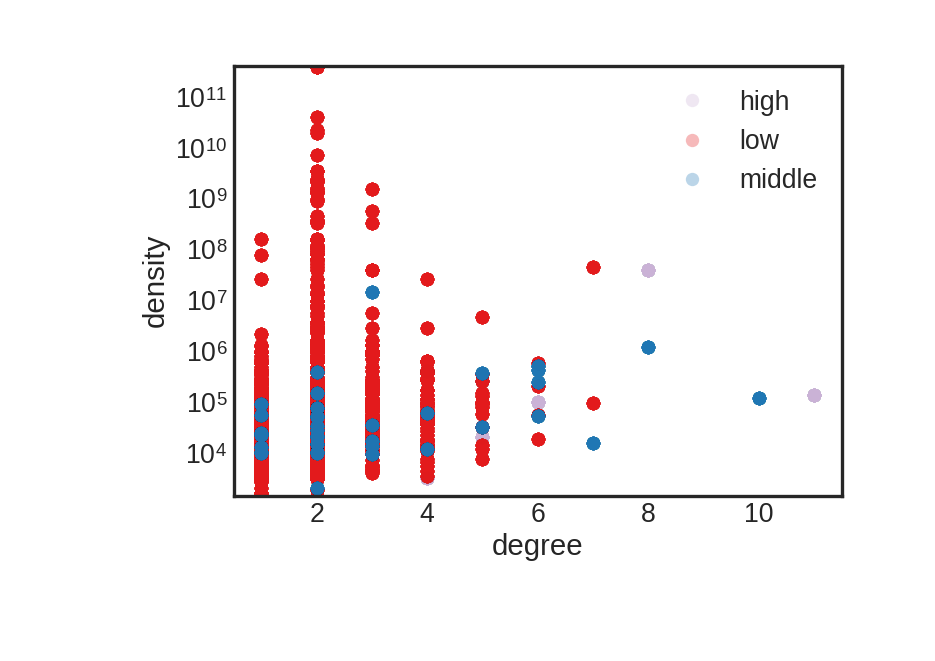

In [22]:
fig = level_scatter(dfn, x="degree", y="density", cmap=canvas.discrete_colours.colors[[9, 4, 0]])
plt.subplots_adjust(bottom=.25, left=.25)
plt.savefig("ilg_density_vs_degree.png")

<IPython.core.display.Javascript object>


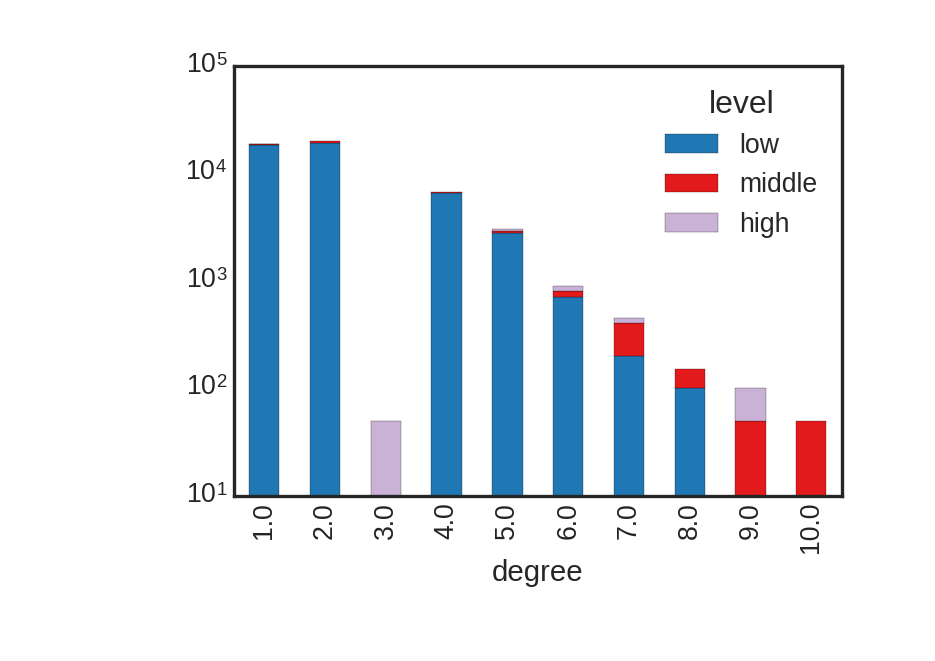

In [23]:
bins = np.linspace(1, np.max(dfn.degree), np.max(dfn.degree), endpoint=True)
fig = level_hist(dfn, "degree", bins, cmap=canvas.discrete_colours.colors[[0, 4, 9]])
plt.subplots_adjust(bottom=.25, left=.25)
plt.savefig("ilg_degree_log.pdf")

<IPython.core.display.Javascript object>


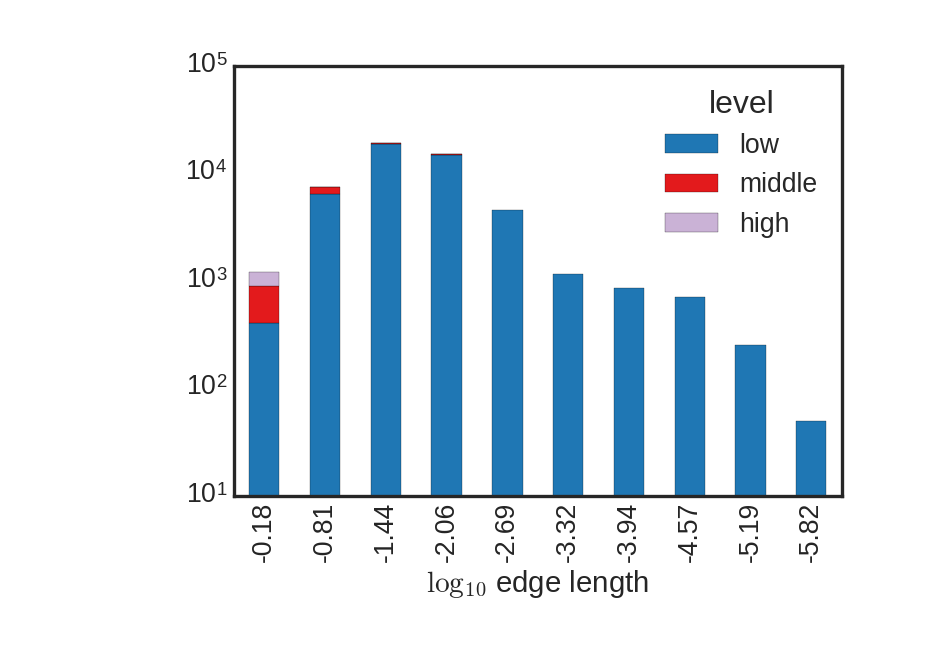

In [24]:
bins = np.around(np.linspace(np.min(dfe.loglength), np.max(dfe.loglength), 10, endpoint=True), 2)[::-1]
fig = level_hist(dfe, "loglength", bins,  cmap=canvas.discrete_colours.colors[[0, 4, 9]])
ax = fig.get_axes()
ax.set_xlabel(r"$\log_{10}$ edge length")
plt.subplots_adjust(bottom=.25, left=.25)
plt.savefig("ilg_loglength.pdf")